In [1]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
fs=20

np.seterr(divide='ignore', invalid='ignore') # to ignore dividing by zero warnings for ratio plot

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Plot figure 1 

The function & blocks below plot Figure 1 of the Double Compact Object Paper. The data is summarized in several csv files that you can download from the corresponding Zenodo directory. 
The data for this plot are given in the directory summary_data_Fig_1, and are called 
 - formationRatesTotalAndPerChannel_BHBH_.csv
 - formationRatesTotalAndPerChannel_BHNS_.csv
 - formationRatesTotalAndPerChannel_NSNS_.csv
    
they contain more information (namely the rates for all formation channels), but we will only use the "total" rate here. 

You will have to change the path in the code to the path where your folder summary_data_Fig_1 is located to read in the pandas files. 




# Plot Figure 1 , formation rate of DCO mergers as a function of metallicity

In [ ]:


def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='../dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict):
    """ plots the formation yield of BHBH, BHNS and NSNS as a function of metallicity
    it uses as input the formationRatesTotalAndPerChannel datafiles (see Zenodo for files) that 
    should be located in the user-specified directory pathCSVfile 
    alphabetDirDict are the names of the simulated data that one wants to plot, 
    """

    ncols, nrows = 1, 3  # set figure size and properties
    f, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20,20), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  



    
    Types      = ['BBH', 'BHNS',  'BNS']
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    # define metallicity array (these are the metallicities of the simulations)
    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]
    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        axe = ax[ind_t]
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel: 
            upperY = np.asarray(df[key_])
            del key_

            if ind_t==0:  
                labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
            else:
                labelname=None

            lw=2
            ms = 9 
            axe.plot(log10metallicities, upperY*1e5, color=BPScolors[ind_m], \
                      lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
            # add facecolor to indicate regions above and below fiducial formation yields
            if ind_m==0:
                axe.fill_between(log10metallicities, (1E-3)*np.ones_like(upperY), upperY*1e5, color='gray', alpha=0.1)
                axe.fill_between(log10metallicities,  upperY*1e5, (100)*np.ones_like(upperY),color='gray', alpha=0.4)     

            
        y_top=35  # max Y value to plot 
        if ind_t ==0:  
            # get legend labels
            handles, labels = axe.get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities as vertical lines 
#         text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
#                      r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
#                      r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        text_list = [r'$Z=Z_{\odot}$', r'$Z=Z_{\odot}/2$', \
                     r'$Z=Z_{\odot}/5$',  r'$Z=Z_{\odot}/10$',\
                     r'$Z=0.001$', r'$Z=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe.plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            # add metallicity values as text to metallicity lines
            if ind_t==0:
                axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
            else:
                axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')
        
        
        # set axes name 
#       nameX = r'$\log_{10}(Z_{\rm{i}})$'  # uncomment to change to Z with i subscript 
        nameX = r'$\log_{10}(Z)$'
        nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
        axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

        # set yscale and x and y limits 
        axe.set_yscale('log')
        axe.set_xlim(min(log10metallicities), max(log10metallicities))
        axe.set_ylim(bottom=0.001,top=y_top)

            
        # add box with label to indicate which DCO type we are plotting in the top left of each panel   
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(DCOname), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
        # add a label for the gray areas in the background 
        if ind_t in [1,2]:
            axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
        if ind_t in [0,1]:
            axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
            if ind_t==0:
                axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")


    # add legend, 
    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=18, ncol=5,\
         bbox_to_anchor=(0.98, 3.76)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
    plt.savefig('./FormationRateAllModels3panels_vertical.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRateAllModels3panels_vertical.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
    plt.show()
    plt.close() 

    

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


# Plot rate ratios: (Figure B1)

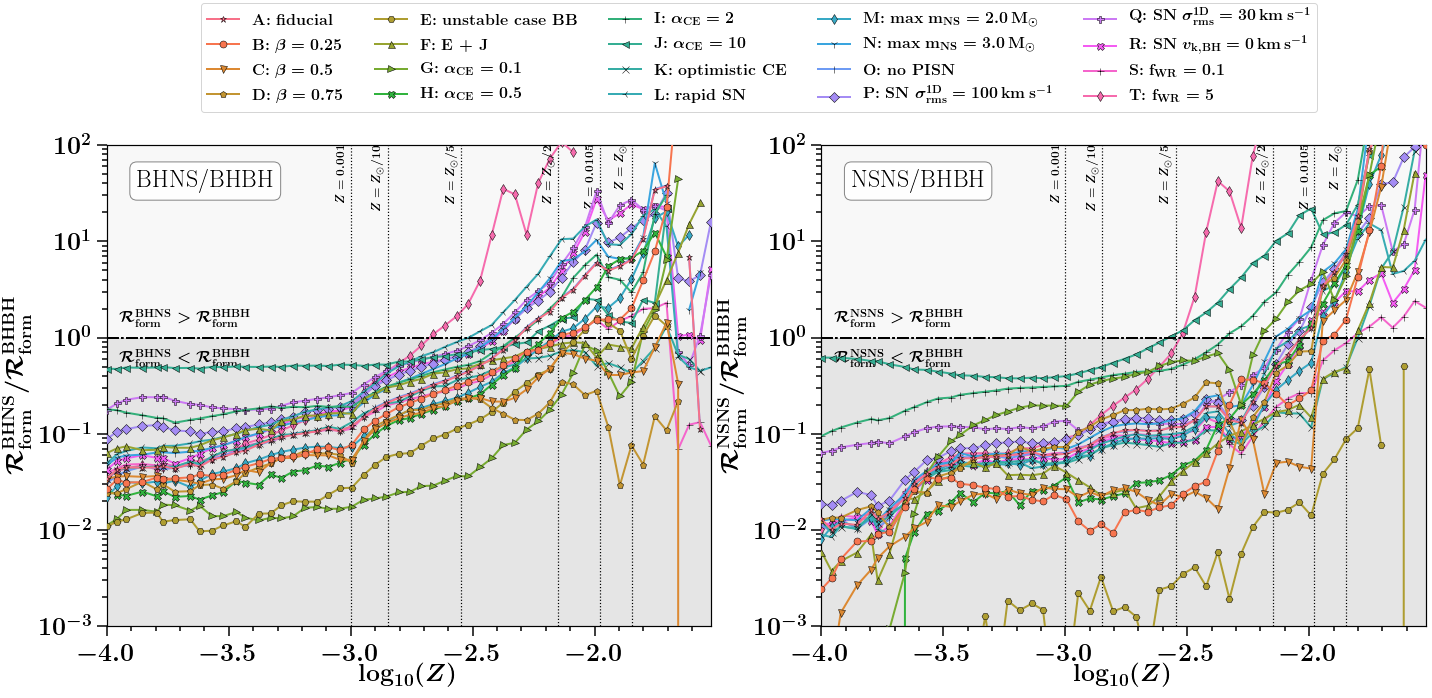

In [4]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatioRatePerZ(pathCSVfile='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    
    ncols=2
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS/BHBH',  'NSNS/BHBH']

    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
   
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    for ind_m, bps_model in enumerate(BPSnameslist):
        for ind_t, DCOtype in enumerate(Types):
            

            DCOname = dictDCOtypeDCOlabel[DCOtype]
            df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
            key_ =  bps_model + ' ' + 'total'+ '  [Msun^{-1}]'
            # rate of this channel:             
            upperY = np.asarray(df[key_])

            labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
                
                
            if ind_t==0:
                upperY_BHBH = upperY
            elif ind_t==1:
                upperY_BHNS = upperY
            elif ind_t==2:
                upperY_NSNS = upperY
      
        
        BHNSratio = upperY_BHNS/upperY_BHBH
        NSNSratio = upperY_NSNS/upperY_BHBH
        
        axe[0].plot(log10metallicities, BHNSratio, color=BPScolors[ind_m], \
                  lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                        linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
        axe[1].plot(log10metallicities, NSNSratio, color=BPScolors[ind_m], \
                  lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                        linestyle='-', zorder=zorderlist[ind_m], label=None)         
        y_top=100
        
        if ind_m==0:
            for ind_axx, axex in enumerate([axe[0], axe[1]]):
                txts_above = [r'$\mathcal{R}_{\rm{form}}^{\rm{BHNS}} > \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$', r'$\mathcal{R}_{\rm{form}}^{\rm{NSNS}} > \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$']
                txts_below = [r'$\mathcal{R}_{\rm{form}}^{\rm{BHNS}} < \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$', r'$\mathcal{R}_{\rm{form}}^{\rm{NSNS}} < \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$']
                axex.fill_between(log10metallicities, np.ones_like(log10metallicities), y_top*np.ones_like(log10metallicities), color='gray', alpha=0.05)
                axex.fill_between(log10metallicities, 0.001*np.ones_like(log10metallicities), np.ones_like(log10metallicities), color='gray', alpha=0.2)
                
                axex.text(-3.95, 1*1.2, s=txts_above[ind_axx], fontsize=fs-4, rotation=0, verticalalignment='bottom', ha='left')
                axex.text(-3.95, 1/1.4, s=txts_below[ind_axx], fontsize=fs-4, rotation=0, verticalalignment='top', ha='left')

 

    # plot Z values for some fixed metallicities
#         text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
#                      r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
#                      r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
    text_list = [r'$Z=Z_{\odot}$', r'$Z=Z_{\odot}/2$', \
                     r'$Z=Z_{\odot}/5$',  r'$Z=Z_{\odot}/10$',\
                     r'$Z=0.001$', r'$Z=0.0105$'] 
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        for ind_ax in range(2):
            axe[ind_ax].plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  

            axe[ind_ax].text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')

            axe[ind_ax].plot([min(log10metallicities), max(log10metallicities)], [1,1], \
                             c='k',\
                             lw=1.8, alpha=1, linestyle='-.', zorder=100) 

#             nameX = r'$\log_{10}(Z_{\rm{i}})$'
    for ind_ax in range(2):
        nameX = r'$\log_{10}(Z)$'
        if ind_ax==0:
            nameY = r'$\mathcal{R}_{\rm{form}}^{\rm{BHNS}} / \mathcal{R}_{\rm{form}}^{\rm{BHBH}}   $'
        else:
            nameY = r'$\mathcal{R}_{\rm{form}}^{\rm{NSNS}} / \mathcal{R}_{\rm{form}}^{\rm{BHBH}}  $'
        axe[ind_ax] = layoutAxes(axe[ind_ax], nameX=nameX, nameY=nameY)




        axe[ind_ax].set_yscale('log')
        aBit =0.
        axe[ind_ax].set_xlim(min(log10metallicities)-aBit, max(log10metallicities)+aBit)
        axe[ind_ax].set_ylim(bottom=0.001,top=1.*y_top)



        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_ax].annotate(r'%s'%(TypesLabels[ind_ax+1]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+4, weight = 'bold', ha='left', va="top",bbox=bbox_props)


  
    handles, labels = axe[0].get_legend_handles_labels()     
        
    lgd = f.legend(handles, labels, fontsize=fs-4, ncol=5,\
                         bbox_to_anchor=(.92, 1.22)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  
    plt.tight_layout()
#     lgd2=plt.legend(handles, labels , fontsize=16, ncol=6,\
#          bbox_to_anchor=(.74, 1.30)) #,  markerscale=3., scatterpoints=1)
    


    plt.savefig('./FormationRatioRateAllModels3panels.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRatioRateAllModels3panels.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close() 

    
plotFormationRatioRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    
